# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

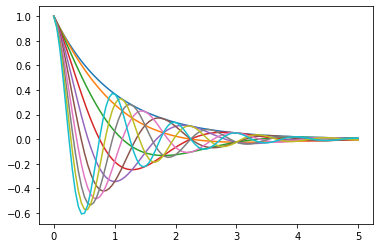

In [2]:
fig, ax = plt.subplots()
x = np.linspace(0, 5, 100)
ang = np.linspace(0, 2, 10)

for t in ang:
        y = (np.cos((np.pi)*t*x))*(np.exp(-x))
        ax.plot(x, y, linewidth=1.5, alpha=1)
plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [3]:
import pandas as pd

Text(0, 0.5, 'Double faults per match')

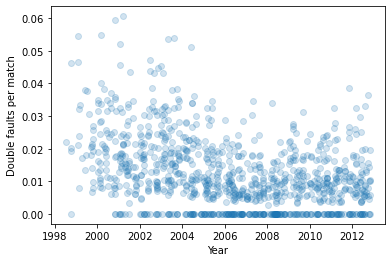

In [4]:
df = pd.read_csv('data/tennis.csv')
df['Double faults per match'] = df['player1 double faults'] / df['player1 total points total']
result = df.groupby('start date').agg({'Double faults per match': ['mean']}) 

x = pd.to_datetime(df['start date'])
y = df['Double faults per match']

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.2)
#ax.scatter(x, result)

plt.xlabel('Year')
plt.ylabel('Double faults per match')

Text(0, 0.5, 'Double faults per match')

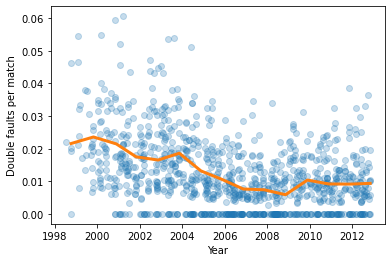

In [5]:
fig,ax=plt.subplots(1,1)

ax.plot_date(pd.to_datetime(df['start date']),df['Double faults per match'],alpha=0.25,lw=0)
ax.plot_date(pd.to_datetime(df.groupby('year')['start date'].max()), df.groupby('year')['Double faults per match'].mean(), '-', lw = 3)

plt.xlabel('Year')
plt.ylabel('Double faults per match')

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [6]:
!pip install --upgrade pandas-datareader

Requirement already up-to-date: pandas-datareader in c:\users\gayar\anaconda3\lib\site-packages (0.9.0)


In [7]:
import datetime as dt
from pandas_datareader import data

In [8]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.080002,101.120003,115.209999,47.860001,116.279999,39.480000,1539.130005,323.809998,57.400002,46.930000,1045.849976,48.720001,60.910000
2019-01-03,44.490002,97.400002,112.910004,46.389999,114.650002,35.547501,1500.280029,310.899994,55.700001,46.639999,1016.059998,47.020000,61.150002
2019-01-04,47.220001,101.930000,117.320000,49.220001,119.730003,37.064999,1575.390015,327.079987,56.599998,47.570000,1070.709961,49.209999,62.810001
2019-01-07,47.439999,102.059998,118.150002,49.480000,121.279999,36.982498,1629.510010,328.109985,56.439999,46.950001,1068.390015,49.720001,62.549999
2019-01-08,47.740002,102.800003,119.830002,49.330002,122.309998,37.687500,1656.579956,340.529999,55.950001,47.480000,1076.280029,49.889999,63.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,59.410000,157.380005,134.979996,54.459999,141.339996,71.067497,1789.209961,333.000000,88.769997,54.709999,1343.560059,67.760002,49.099998
2019-12-26,59.820000,158.669998,134.910004,54.810001,141.529999,72.477501,1868.770020,329.920013,88.400002,55.020000,1360.400024,68.019997,49.660000
2019-12-27,60.080002,158.960007,135.270004,54.930000,141.279999,72.449997,1869.800049,330.140015,88.800003,55.349998,1351.890015,67.779999,50.060001


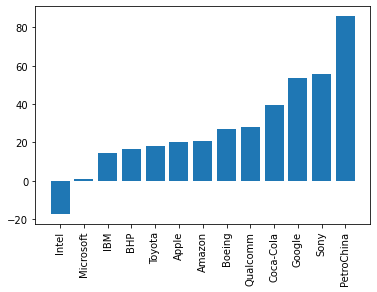

In [9]:
x = list(ticker_list.values())
labels = x
data = ((ticker.iloc[-1] - ticker.iloc[0]) / ticker.iloc[0] * 100).sort_values()
plt.bar(x,data)
plt.xticks(x, labels, rotation='vertical')
plt.show()

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

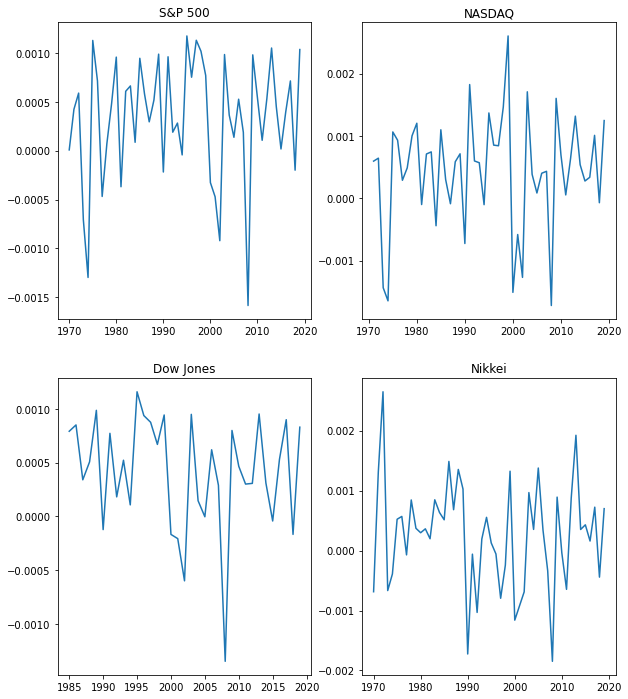

In [10]:
import datetime as dt
from pandas_datareader import data

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

# reference: https://unix.stackexchange.com/questions/26205/why-does-unix-time-start-at-1970-01-01

def read_data(indices_list,
          start=dt.datetime(1970, 1, 1),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in indices_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(indices_list)
ticker = ticker.pct_change()

fig, axes = plt.subplots(2, 2, figsize=(10, 12))
# 1
axes[0, 0].plot(ticker.groupby(ticker.index.year).agg({'^GSPC': ['mean']}))
axes[0, 0].set(title=indices_list['^GSPC'])

# 2
axes[1, 0].plot(ticker.groupby(ticker.index.year).agg({'^DJI': ['mean']}))
axes[1, 0].set(title=indices_list['^DJI'])

# 3
axes[0, 1].plot(ticker.groupby(ticker.index.year).agg({'^IXIC': ['mean']}))
axes[0, 1].set(title=indices_list['^IXIC'])

# 4
axes[1, 1].plot(ticker.groupby(ticker.index.year).agg({'^N225': ['mean']}))
axes[1, 1].set(title=indices_list['^N225'])
plt.show()

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

Text(0, 0.5, 'Double faults per match')

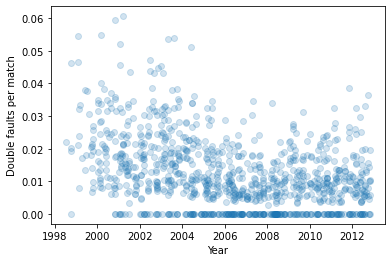

In [11]:
df = pd.read_csv('data/tennis.csv')
df['Double faults per match'] = df['player1 double faults'] / df['player1 total points total']
result = df.groupby('start date').agg({'Double faults per match': ['mean']}) 

x = pd.to_datetime(df['start date'])
y = df['Double faults per match']

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.2)
#ax.scatter(x, result)

plt.xlabel('Year')
plt.ylabel('Double faults per match')

In [12]:
surfaces = list(set(list(df['surface'])))
surfaces.sort(reverse=True)
results = []
for s in range(len(surfaces)):
    x = pd.to_datetime(df.loc[df['surface'] == surfaces[s], 'start date'])
    y = df.loc[df['surface'] == surfaces[s],'Double faults per match']
    results.append((surfaces[s],x,y))

[Text(0.5, 1.0, 'Indoor: Carpet')]

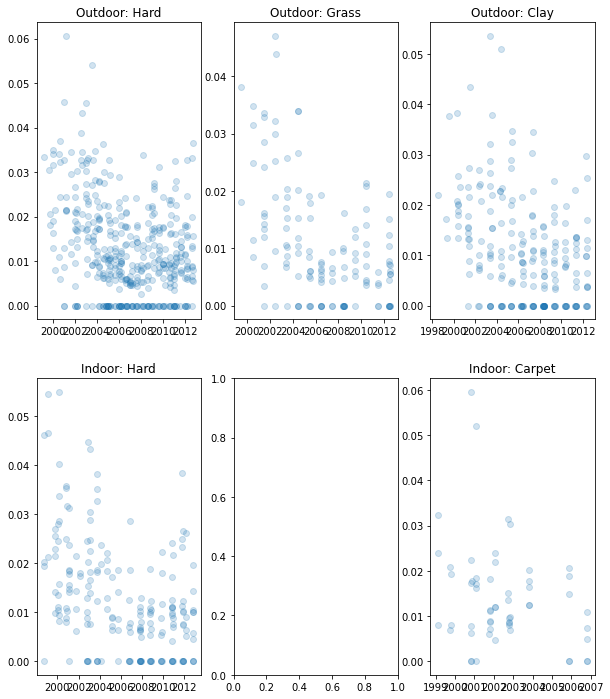

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(10, 12))

axes[0, 0].scatter(results[0][1], results[0][2], alpha=0.2)
axes[0, 0].set(title = results[0][0])

axes[0, 1].scatter(results[1][1], results[1][2], alpha=0.2)
axes[0, 1].set(title = results[1][0])

axes[0, 2].scatter(results[2][1], results[2][2], alpha=0.2)
axes[0, 2].set(title = results[2][0])

axes[1, 0].scatter(results[3][1], results[3][2], alpha=0.2)
axes[1, 0].set(title = results[3][0])

# axes[1, 1].scatter(results[4][1], results[4][2], alpha=0.2)
# axes[1, 1].set(title = results[4][0])

axes[1, 2].scatter(results[5][1], results[5][2], alpha=0.2)
axes[1, 2].set(title = results[5][0])